In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from keras import layers
from keras import models
from keras.applications.vgg16 import VGG16

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/BC.s/base  /content

In [4]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/BC.s/preprocessing.py  /content

In [5]:
import preprocessing

In [6]:
X_train, X_val, y_train, y_val = preprocessing.loadData()

#Model

In [16]:
img_size = 128

In [96]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [97]:
conv_base.trainable = False

In [98]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [99]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_16 (Flatten)        (None, 8192)              0         
                                                                 
 dense_32 (Dense)            (None, 256)               2097408   
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_33 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [100]:
import math
initial_learning_rate = 0.0001
epochs = 50
decay = initial_learning_rate / epochs
def lr_exp_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

optimizer = keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=optimizer,
              metrics=['accuracy'])

In [101]:
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs = epochs,
    shuffle=True,
    validation_data = (X_val, y_val),
    callbacks=[keras.callbacks.LearningRateScheduler(lr_exp_decay)],
) 

Epoch 1/50
50/50 [==============================] - 7s 133ms/step - loss: 0.6402 - accuracy: 0.6452 - val_loss: 0.5302 - val_accuracy: 0.7617 - lr: 1.0000e-04
Epoch 2/50
50/50 [==============================] - 6s 126ms/step - loss: 0.4848 - accuracy: 0.8163 - val_loss: 0.4322 - val_accuracy: 0.8184 - lr: 1.0000e-04
Epoch 3/50
50/50 [==============================] - 6s 126ms/step - loss: 0.4144 - accuracy: 0.8456 - val_loss: 0.3745 - val_accuracy: 0.8865 - lr: 9.9999e-05
Epoch 4/50
50/50 [==============================] - 6s 126ms/step - loss: 0.3759 - accuracy: 0.8646 - val_loss: 0.3514 - val_accuracy: 0.8361 - lr: 9.9999e-05
Epoch 5/50
50/50 [==============================] - 6s 127ms/step - loss: 0.3386 - accuracy: 0.8709 - val_loss: 0.2988 - val_accuracy: 0.9029 - lr: 9.9998e-05
Epoch 6/50
50/50 [==============================] - 6s 128ms/step - loss: 0.3028 - accuracy: 0.8968 - val_loss: 0.2774 - val_accuracy: 0.9092 - lr: 9.9997e-05
Epoch 7/50
50/50 [============================

In [102]:
model.save('./VGG.h5', overwrite=True)

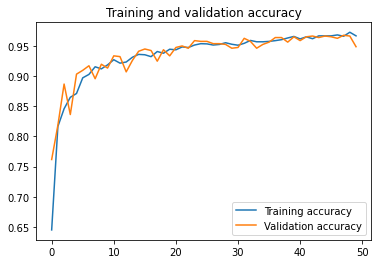

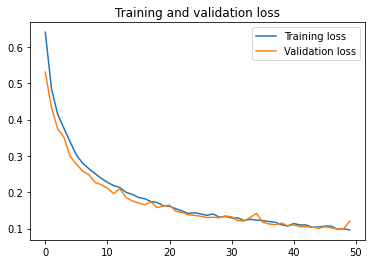

In [103]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()